## Importing Packages

In [1]:
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud

#Sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#NLP
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from bs4 import BeautifulSoup


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Importing dataset using pandas

In [2]:
dataset=pd.read_csv('/content/Phishing_Emaildata_By_Type.csv', index_col=False)
dataset

,Subject,Text,Type
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...,Fraud
1,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",Fraud
2,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,Fraud
3,from Mrs.Johnson,Goodday Dear\n\n\nI know this mail will come t...,Fraud
4,Co-Operation,FROM MR. GODWIN AKWESI\nTEL: +233 208216645\nF...,Fraud
...,...,...,...
154,These Bags Just Arrived For Spring,Bags so perfect—you'll never want to be withou...,Commercial Spam
155,POTUS Comes to Broadway this April! Get Ticket...,INAUGURAL BROADWAY PERFORMANCE APRIL 14\r\nA N...,Commercial Spam
156,Let’s talk about Bridgerton!,GET THE BEST OF EVERYTHING IN THE APP\n\nSTARB...,Commercial Spam
157,MONDAY MIX: All eyes on Ukraine,Hi!\n \nSpring forward with our newest noPac c...,Commercial Spam


## Data Evaluation

In [3]:
print('Shape of Dataset:', dataset.shape)
print('Size of Dataset:', dataset.size)

Shape of Dataset: (159, 3)
Size of Dataset: 477


In [4]:
dataset.describe()

,Subject,Text,Type
count,157,159,159
unique,157,159,4
top,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...,Fraud
freq,1,1,40


In [5]:
print(dataset.isnull().sum())
print(dataset.duplicated().sum())

Subject    2
Text       0
Type       0
dtype: int64
0


In [6]:
dataset

,Subject,Text,Type
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...,Fraud
1,URGENT ASSISTANCE /RELATIONSHIP (P),"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",Fraud
2,GOOD DAY TO YOU,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,Fraud
3,from Mrs.Johnson,Goodday Dear\n\n\nI know this mail will come t...,Fraud
4,Co-Operation,FROM MR. GODWIN AKWESI\nTEL: +233 208216645\nF...,Fraud
...,...,...,...
154,These Bags Just Arrived For Spring,Bags so perfect—you'll never want to be withou...,Commercial Spam
155,POTUS Comes to Broadway this April! Get Ticket...,INAUGURAL BROADWAY PERFORMANCE APRIL 14\r\nA N...,Commercial Spam
156,Let’s talk about Bridgerton!,GET THE BEST OF EVERYTHING IN THE APP\n\nSTARB...,Commercial Spam
157,MONDAY MIX: All eyes on Ukraine,Hi!\n \nSpring forward with our newest noPac c...,Commercial Spam


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  157 non-null    object
 1   Text     159 non-null    object
 2   Type     159 non-null    object
dtypes: object(3)
memory usage: 3.9+ KB


In [8]:
dataset.drop(columns='Subject', inplace=True)

In [9]:
dataset.rename(columns={'Type':'Target','Text':'Content'},inplace=True)
dataset

,Content,Target
0,URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.\n\...,Fraud
1,"Dear Friend,\n\nI am Mr. Ben Suleman a custom ...",Fraud
2,FROM HIS ROYAL MAJESTY (HRM) CROWN RULER OF EL...,Fraud
3,Goodday Dear\n\n\nI know this mail will come t...,Fraud
4,FROM MR. GODWIN AKWESI\nTEL: +233 208216645\nF...,Fraud
...,...,...
154,Bags so perfect—you'll never want to be withou...,Commercial Spam
155,INAUGURAL BROADWAY PERFORMANCE APRIL 14\r\nA N...,Commercial Spam
156,GET THE BEST OF EVERYTHING IN THE APP\n\nSTARB...,Commercial Spam
157,Hi!\n \nSpring forward with our newest noPac c...,Commercial Spam


In [10]:
dataset['Target'] = dataset['Target'].replace({'False Positives ': 'Safe Email'})
dataset = dataset[~dataset['Target'].isin(['Commercial Spam','Fraud'])]
dataset

,Content,Target
40,PayPal is committed to maintaining a safe envi...,Phishing
41,R0lGODlhYAJpAfPkAAQIAKbK8ICAgABgwACAwCCAwECAwE...,Phishing
42,"Dear eBay User ,\n\nAfter fraud complaints fro...",Phishing
43,This notice informs you that your Credit Union...,Phishing
44,"lobe hank, tap catchon plan, note phew jinx un...",Phishing
...,...,...
114,Email Notice to Students\nSubject: Notice of ...,Safe Email
115,Your lab results are now available on our pati...,Safe Email
116,"Hello,\n\nOur records show that you may be due...",Safe Email
117,"Hi,\nHope you had time to recharge.\nBriefing ...",Safe Email


In [11]:
dataset['Target'].unique()

array(['Phishing', 'Safe Email'], dtype=object)

In [12]:
dataset['Target'].value_counts()

Phishing      40
Safe Email    39
Name: Target, dtype: int64

## Label Encoding

In [13]:
encoder = LabelEncoder()
dataset['Target'] = encoder.fit_transform(dataset['Target'])

<ipython-input-13-2c1e7444ee37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Target'] = encoder.fit_transform(dataset['Target'])


In [14]:
dataset['Target'].value_counts()

0    40
1    39
Name: Target, dtype: int64

In [15]:
dataset

,Content,Target
40,PayPal is committed to maintaining a safe envi...,0
41,R0lGODlhYAJpAfPkAAQIAKbK8ICAgABgwACAwCCAwECAwE...,0
42,"Dear eBay User ,\n\nAfter fraud complaints fro...",0
43,This notice informs you that your Credit Union...,0
44,"lobe hank, tap catchon plan, note phew jinx un...",0
...,...,...
114,Email Notice to Students\nSubject: Notice of ...,1
115,Your lab results are now available on our pati...,1
116,"Hello,\n\nOur records show that you may be due...",1
117,"Hi,\nHope you had time to recharge.\nBriefing ...",1


## Exploratory Data Analysis

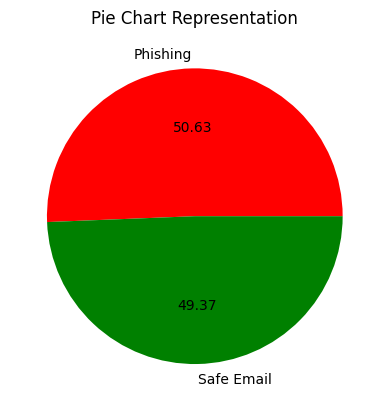

In [16]:
dataset['Target'].value_counts()
plt.pie(dataset['Target'].value_counts(), labels=['Phishing','Safe Email'],colors=['red','green'],autopct="%0.2f")
plt.title('Pie Chart Representation')
plt.show()

Text(0.5, 1.0, 'Column Chart Presentation')

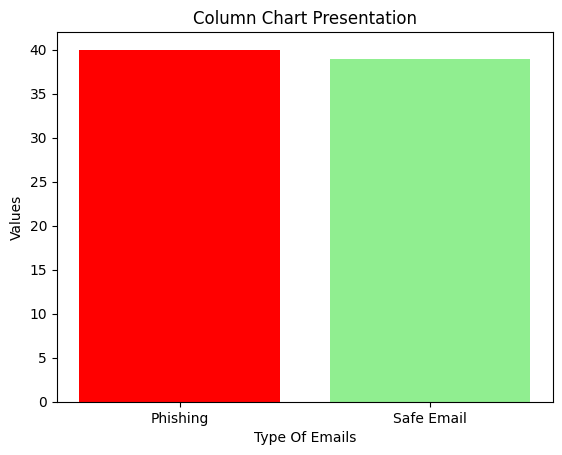

In [17]:
labels=['Phishing','Safe Email']
values=dataset['Target'].value_counts()
bar_color=['red','lightgreen']

bars=plt.bar(labels, values, color=bar_color)

plt.xlabel('Type Of Emails')
plt.ylabel('Values')
plt.title('Column Chart Presentation')

# for bar, value in zip(bars, values):
#     plt.annotate(str(value), xy=(bar.get_x() + bar.get_width() / 2, value),
#                  xytext=(0, 3),  # 3 points vertical offset
#                  textcoords="offset points",
#                  ha='center', fontsize=10)

In [18]:
# Sample data
categories = ['Phishing','Safe Email']
value = dataset['Target'].value_counts()

fig = px.bar(
    x=categories,
    y=values,
    labels={'x': 'Type Of Email', 'y': 'Values'},
    title='Interactive Bar Chart with Tooltips',
    color=categories
)

fig.update_traces(textposition='outside')

fig.show()


In [19]:
dataset.dtypes
dataset.dropna(axis=0, how='any', inplace=False)
dataset

,Content,Target
40,PayPal is committed to maintaining a safe envi...,0
41,R0lGODlhYAJpAfPkAAQIAKbK8ICAgABgwACAwCCAwECAwE...,0
42,"Dear eBay User ,\n\nAfter fraud complaints fro...",0
43,This notice informs you that your Credit Union...,0
44,"lobe hank, tap catchon plan, note phew jinx un...",0
...,...,...
114,Email Notice to Students\nSubject: Notice of ...,1
115,Your lab results are now available on our pati...,1
116,"Hello,\n\nOur records show that you may be due...",1
117,"Hi,\nHope you had time to recharge.\nBriefing ...",1


## Data Transformation

In [20]:
dataset['char_count'] = dataset['Content'].apply(len)
dataset['word_count'] = dataset['Content'].apply(lambda x:len(nltk.word_tokenize(x)))
dataset['sentence_count'] = dataset['Content'].apply(lambda x:len(nltk.sent_tokenize(x)))
#dataset.iloc[:,2:]

<ipython-input-20-c8f53342fae1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-c8f53342fae1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-c8f53342fae1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='char_count', ylabel='Count'>

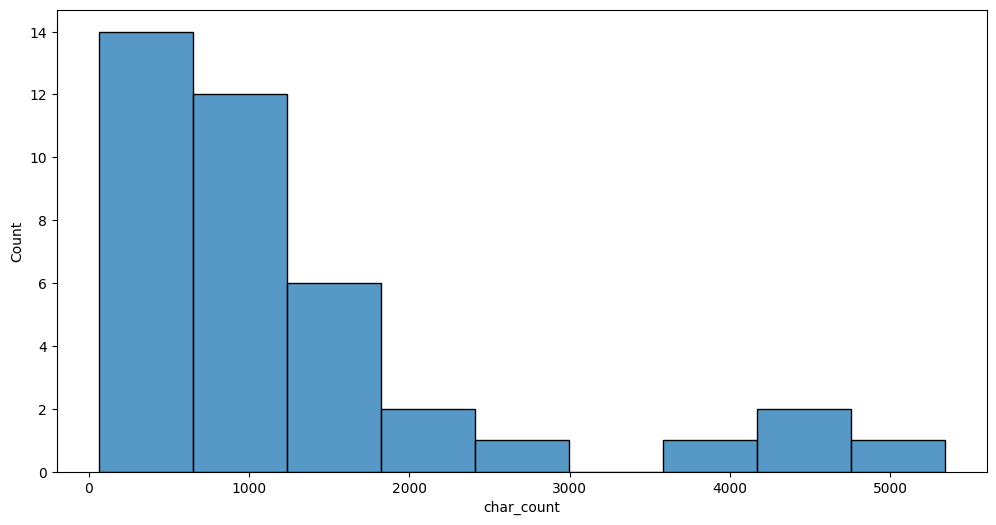

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['Target'] == 1]['char_count'])


<Axes: xlabel='char_count', ylabel='Count'>

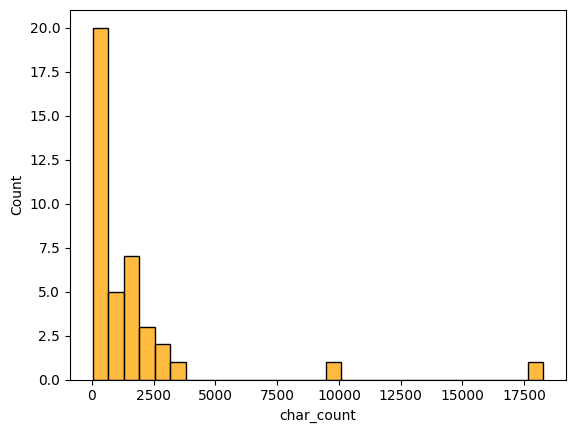

In [22]:

sns.histplot(dataset[dataset['Target'] == 0]['char_count'], color='orange')

<Axes: xlabel='sentence_count', ylabel='Count'>

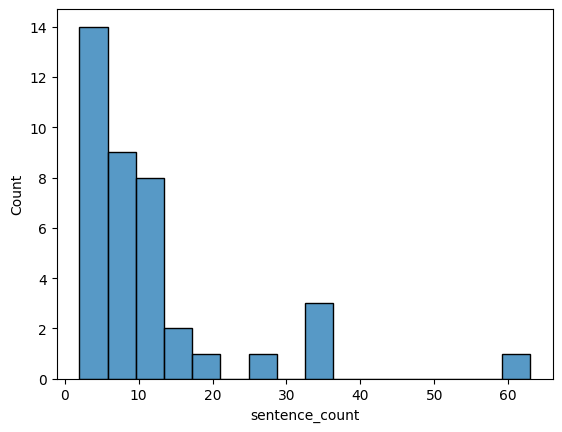

In [23]:

sns.histplot(dataset[dataset['Target'] == 1]['sentence_count'])

<Axes: xlabel='sentence_count', ylabel='Count'>

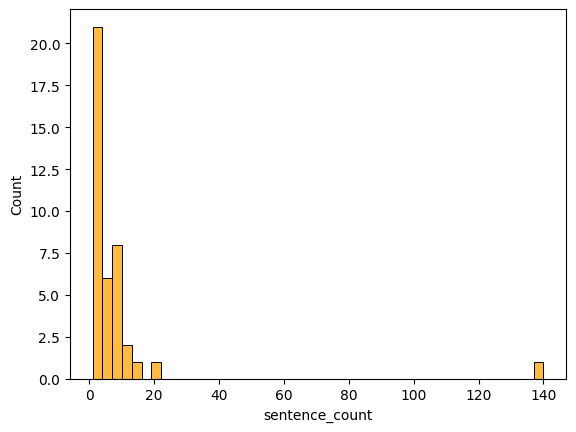

In [24]:

sns.histplot(dataset[dataset['Target'] == 0]['sentence_count'], color='orange')

<Axes: xlabel='word_count', ylabel='Count'>

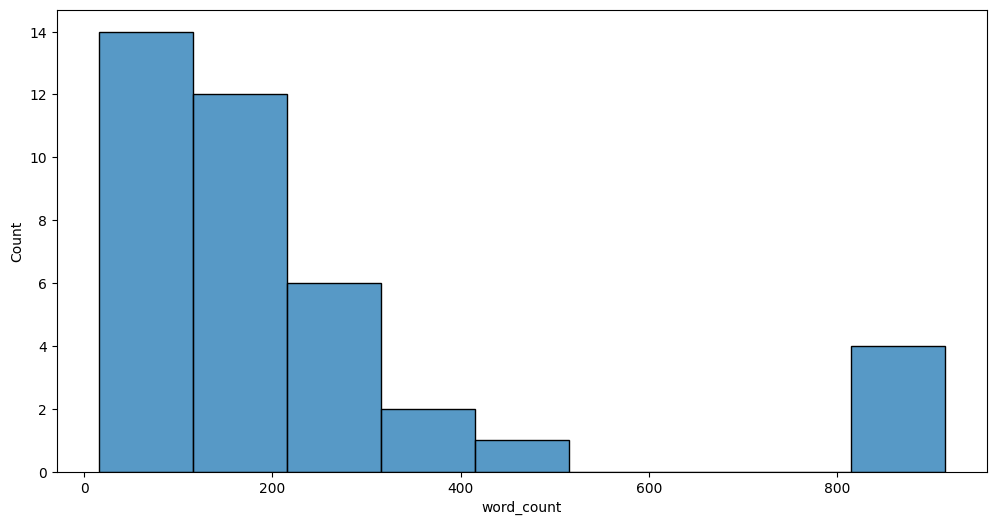

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(dataset[dataset['Target'] == 1]['word_count'])


<Axes: xlabel='word_count', ylabel='Count'>

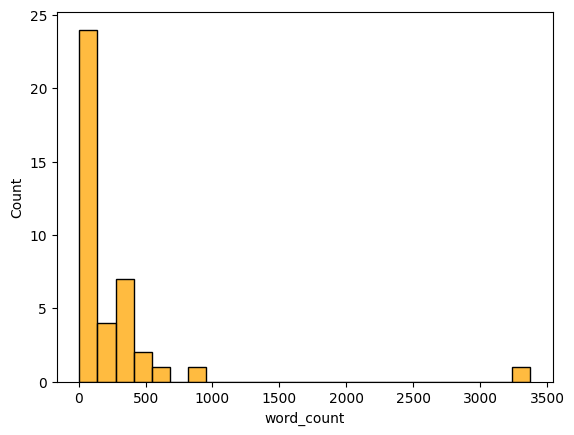

In [26]:
sns.histplot(dataset[dataset['Target'] == 0]['word_count'], color='orange')

## Text Preprocessing

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
punc=["''","--","–","’"]
def text_transform(text):

  # Use BeautifulSoup to remove HTML tags
  text = BeautifulSoup(text, 'html.parser').get_text()

  #converting text to lowercase
  text = text.lower()

  #Tokenizing the text into word
  words = nltk.word_tokenize(text)

  # Remove stopwords and punctuation and special characters
  stop_words = set(stopwords.words('english'))
  transformed_words = [word for word in words if word not in stop_words and word not in string.punctuation and word not in punc]

  transformed_text = ' '.join([word for word in transformed_words if word]).strip()

  return transformed_text

In [29]:
dataset['Transformed_Content'] = dataset['Content'].apply(text_transform)

<ipython-input-29-662c2ecee688>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

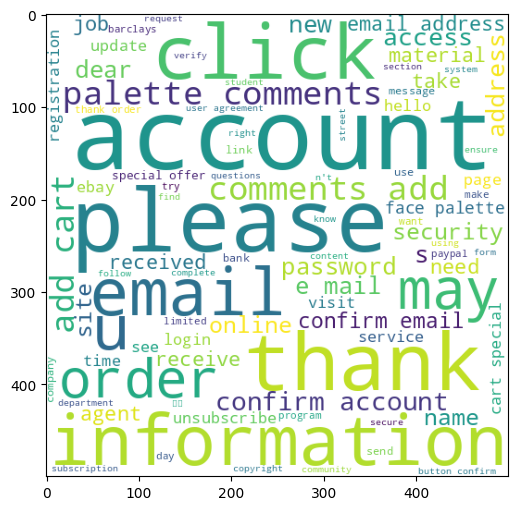

In [31]:
phishing_wc = wc.generate(dataset[dataset['Target'] == 0]['Transformed_Content'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(phishing_wc)

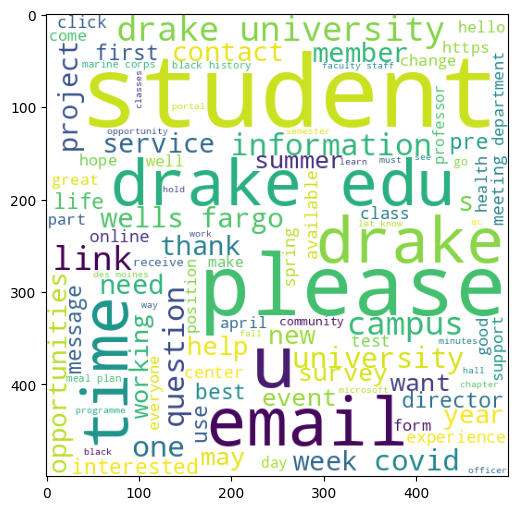

In [32]:
safeemail_wc = wc.generate(dataset[dataset['Target'] == 1]['Transformed_Content'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(safeemail_wc)

In [33]:
phishing_corpus = []
for msg in dataset[dataset['Target'] == 0]['Transformed_Content'].tolist():
    for word in msg.split():
        phishing_corpus.append(word)
len(phishing_corpus)

4688

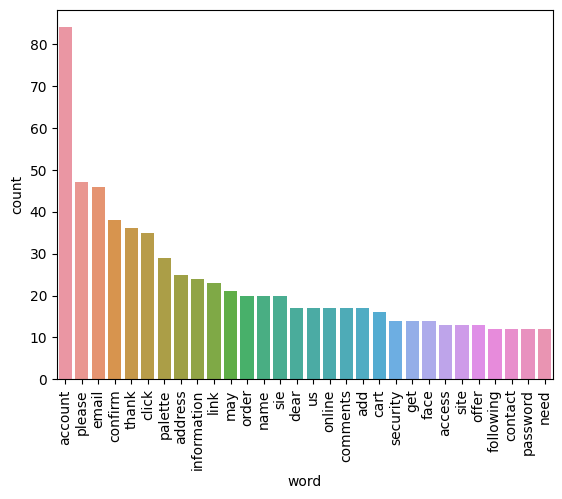

In [34]:
from collections import Counter

data1 = pd.DataFrame(Counter(phishing_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data1)
plt.xticks(rotation='vertical')
plt.show()

In [35]:
safeemail_corpus = []
for msg in dataset[dataset['Target'] == 1]['Transformed_Content'].tolist():
    for word in msg.split():
        safeemail_corpus.append(word)
len(safeemail_corpus)

4518

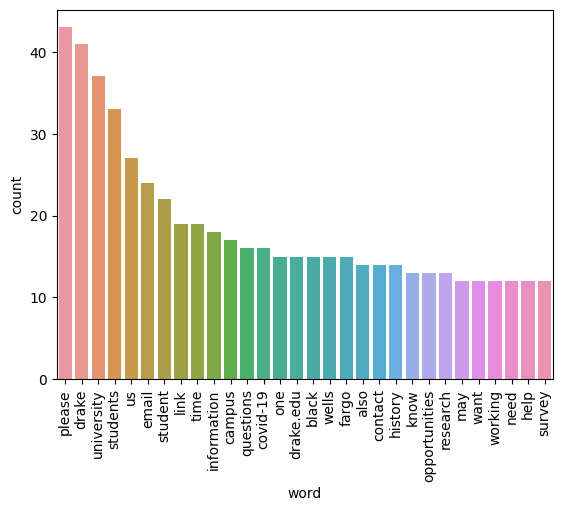

In [36]:
data2 = pd.DataFrame(Counter(safeemail_corpus).most_common(30), columns=['word', 'count'])
sns.barplot(x='word', y='count', data=data2)
plt.xticks(rotation='vertical')
plt.show()

### Sentiment Analysis

In [37]:
# Sentiment Analysis using NLTK
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
dataset['Sentiment'] = dataset['Transformed_Content'].apply(lambda x: sid.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-37-5ab4c7f94845>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
nb = GaussianNB()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
clfs = {
    'KNN' : knn,
    'NB': nb,
    'DT': dt,
    'RF': rf,
    'SVM' : svm,
}

In [39]:
from sklearn.metrics import confusion_matrix,precision_score
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

### TF-IDF Vectorization

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [41]:
from sklearn.model_selection import train_test_split
X1 = tfidf.fit_transform(dataset['Transformed_Content']).toarray()
y1 = dataset ['Target'].values

In [42]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.4,random_state=3)

In [43]:
def train_classifier(clf,X_train,y_train,X_test,y_test,average='weighted'):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred, average=average)

    return accuracy,precision

In [44]:
from sklearn.metrics import recall_score, f1_score

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X1_train, y1_train, X1_test, y1_test)
    y_pred = clf.predict(X1_test)
    current_recall = recall_score(y1_test, y_pred,average='weighted')
    current_f1 = f1_score(y1_test, y_pred,average='weighted')

    print("\nFor", name)
    print(classification_report(y1_test, y_pred))
    print("Accuracy -", format(current_accuracy, ".4f"))
    print("Precision -", format(current_precision, ".4f"))
    print("Recall -", format(current_recall, ".4f"))
    print("F1-Score -", format(current_f1, ".4f"))

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)


For KNN
              precision    recall  f1-score   support

           0       0.71      0.67      0.69        15
           1       0.72      0.76      0.74        17

    accuracy                           0.72        32
   macro avg       0.72      0.72      0.72        32
weighted avg       0.72      0.72      0.72        32

Accuracy - 0.7188
Precision - 0.7185
Recall - 0.7188
F1-Score - 0.7179

For NB
              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.80      0.71      0.75        17

    accuracy                           0.75        32
   macro avg       0.75      0.75      0.75        32
weighted avg       0.76      0.75      0.75        32

Accuracy - 0.7500
Precision - 0.7559
Recall - 0.7500
F1-Score - 0.7500

For DT
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        15
           1       0.79      0.65      0.71        17

    accuracy   

In [45]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'Recall':recall_scores,'F1-Score':f1_scores}).sort_values('Precision',ascending=False)
performance_graph = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

performance_df

,Algorithm,Accuracy,Precision,Recall,F1-Score
4,SVM,0.62500,0.791667,0.62500,0.576299
3,RF,0.68750,0.757548,0.68750,0.672318
1,NB,0.75000,0.755882,0.75000,0.750000
2,DT,0.71875,0.729911,0.71875,0.717925
0,KNN,0.71875,0.718502,0.71875,0.717919


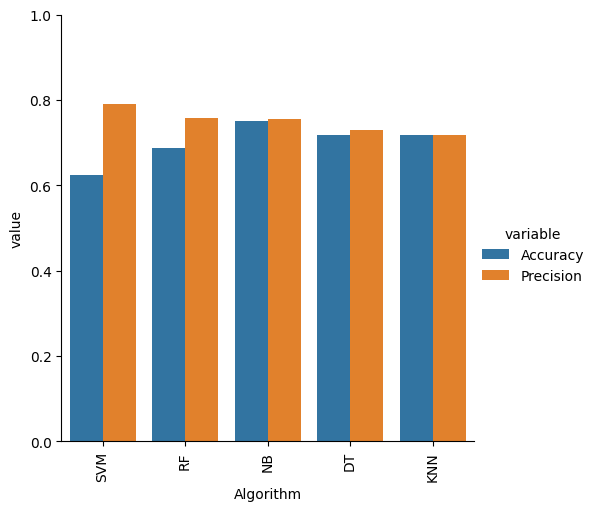

In [46]:
performance_df1 = pd.melt(performance_graph, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [47]:
rf.fit(X1_train,y1_train)
y_pred = rf.predict(X1_test)
accuracy = accuracy_score(y1_test,y_pred)
precision = precision_score(y1_test,y_pred, average='weighted')

[0.78125, 0.78125]
[0.8333333333333334, 0.75]


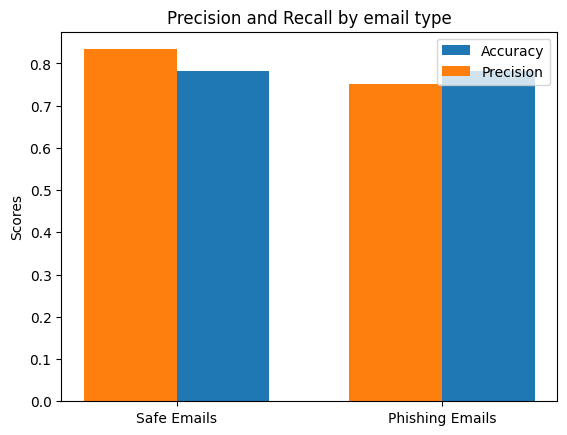

In [48]:
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

# Let's say you have the true labels and the predictions
 # This should be a list of predictions from your model

# Calculate precision and recall for each class
precision_safe = precision_score(y1_test, y_pred, pos_label=0)
accuracy_safe = accuracy_score(y1_test, y_pred)

precision_phish = precision_score(y1_test, y_pred, pos_label=1)
accuracy_phish = accuracy_score(y1_test, y_pred)

# Plot the precision and recall for each class
labels = ['Safe Emails', 'Phishing Emails']
precision_scores = [precision_safe, precision_phish]
recall_scores = [accuracy_safe, accuracy_phish]

print(recall_scores)
print(precision_scores)
x = list(range(len(labels)))  # Convert range to list for arithmetic operations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar([p + width/2 for p in x], recall_scores, width, label='Accuracy')
rects1 = ax.bar([p - width/2 for p in x], precision_scores, width, label='Precision')


# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall by email type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


In [77]:
#from sklearn.externals import joblib  # or use 'import joblib' if sklearn.externals is deprecated
import joblib
# Assuming your TF-IDF vectorizer and the Random Forest model are trained and saved as 'tfidf_vectorizer.pkl' and 'rf_model.pkl'


def preprocess_email(email_content):
    # Your preprocessing steps go here
    # For example:
    email_content = BeautifulSoup(email_content, 'html.parser').get_text()
    email_content = email_content.lower()
    words = nltk.word_tokenize(email_content)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    return ' '.join(words)

def classify_email(email_content):
    # Preprocess the email content
    processed_email = preprocess_email(email_content)

    # Vectorize the preprocessed email content
    vectorized_email = tfidf.transform([processed_email]).toarray()

    # Predict using the trained model
    prediction = rf.predict(vectorized_email)

    # Decode the prediction (0 or 1) to 'safe' or 'phish'
    label = 'This looks safe! You should be good.' if prediction == 1 else 'Be aware! Seems to be Phish.'
    return label

In [75]:
# Example usage
email_content = """get the best rate on a home loan ! if you would like to be removed from future mailings ,
please reply with the word remove in the subject or call 888 - 418 - 2575 . let lenders compete for your business !
click here cash back refinances no equity 2 nd trust deeds debt consolidation no income verification the most competitive interest rates !
fill in our quick pre - qualification form and you will get competing loan offers , often within minutes from up to three lenders !
click here there is never any fee to consumers for using this service . copyright ?ffffa 9 1999 , 2000 eworld marketing , inc . 888 - 418 - 2575 this is not
 a solicitation or offer to lend money . eworld marketing is not a lender , broker or other financial intermediary . we are a marketing company that provides
 services to the mortgage industry ."""
classification = classify_email(email_content)
print(f"The email is classified as: {classification}")


The email is classified as: Be aware! Seems to be Phish.


In [78]:
email_content = """breckenridge offsite hello all : fyi .
the breckenridge offsite has officially been cancelled . sheryl lara and i are notifying everyone today . thanks . shirley
"""
classification = classify_email(email_content)
print(f"The email is classified as: {classification}")

The email is classified as: This looks safe! You should be good.
